In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Exploratory Analysis

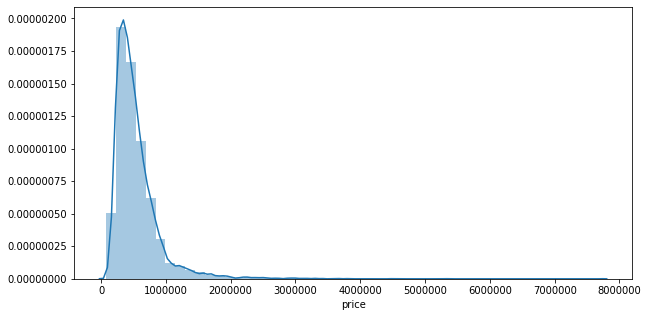

In [31]:
plt.figure(figsize=(10,5))
sb.distplot(df['price'])

>We can see that price of the houses are majorly distributed upto 1.5 million and rest what we see are the outlier and should be treated in order to get accurate predictions. Since it'd be not helpful for our model to train on this extreme outliers.

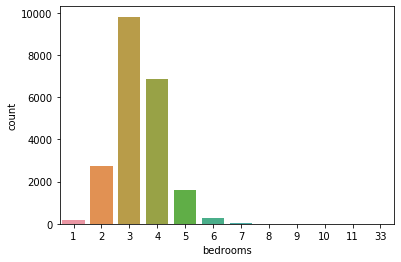

In [17]:
sb.countplot(df['bedrooms'])

In [21]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

List of features that have high correlation with the price and as we can see that "sqft_living", "grade" and "sqft_above" have highest correlation among others.

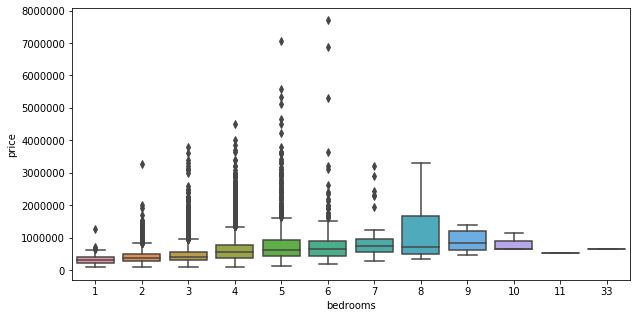

In [30]:
plt.figure(figsize=(10,5))
sb.boxplot(df['bedrooms'], df['price'])

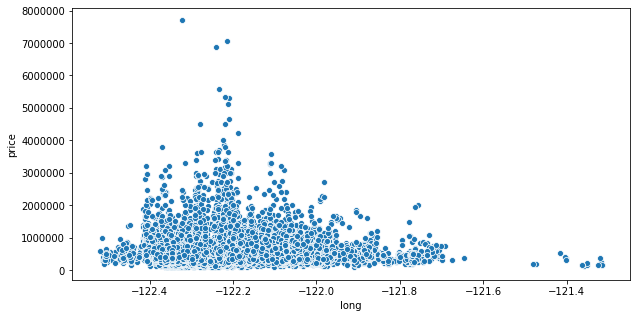

In [29]:
plt.figure(figsize=(10,5))
sb.scatterplot(df['long'], df['price'])

>Looks like housing prices around area within longitude (-122.4) - (-122.2) have an expensive price distribution for the houses.

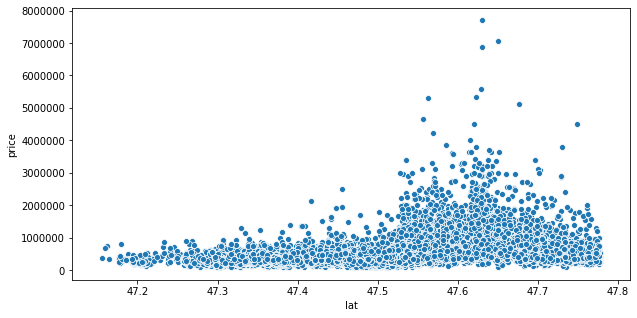

In [33]:
plt.figure(figsize=(10,5))
sb.scatterplot(df['lat'], df['price'])

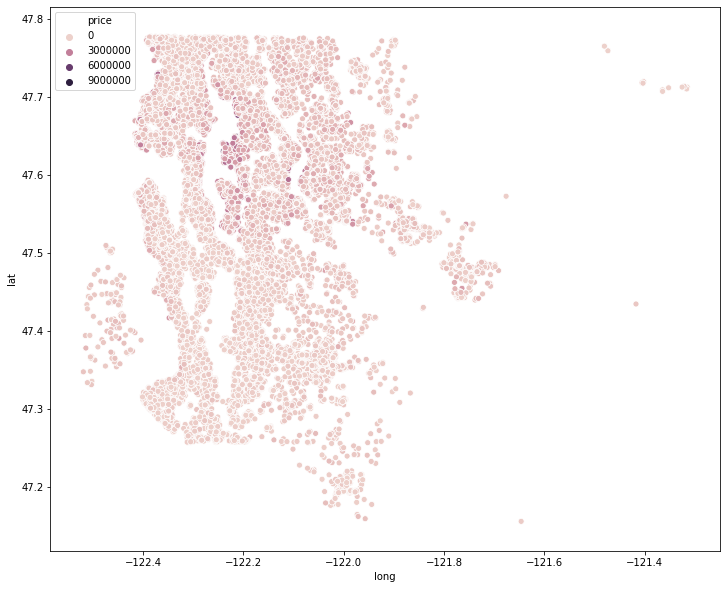

In [52]:
plt.figure(figsize=(12,10))
sb.scatterplot('long', 'lat', hue='price', data=df)

>This distribution is not clear to get the idea of what's happening. Have to remove outliers in order to get more clear picture of the price distribution accross seattle.

In [82]:
not_in_top_houses = df.sort_values('price', ascending=False).iloc[round(len(df)*0.01):]
#This will get the list of the houses that are not included in top 1% of the houses.

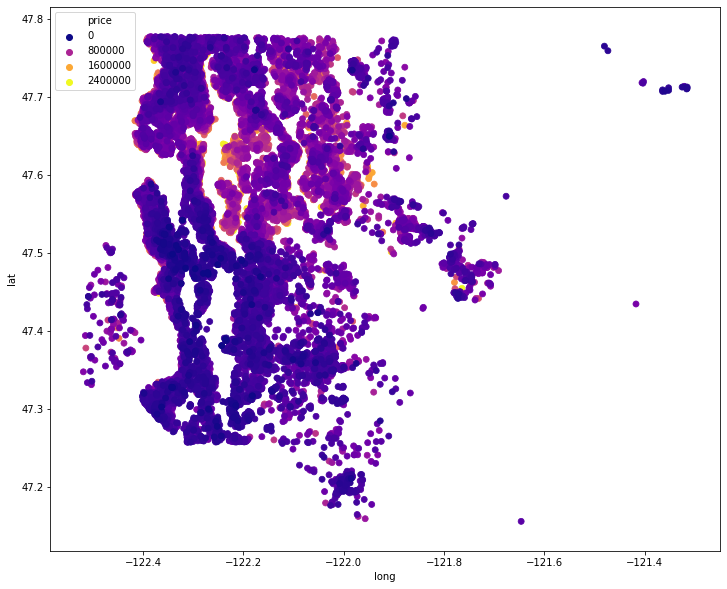

In [83]:
plt.figure(figsize=(12,10))
sb.scatterplot('long', 'lat', hue='price', data=not_in_top_houses, palette='plasma', edgecolor= None)

> **#1** - The properties around the sea areas have lighter points, which means they hold higher value, than the rest of the inland property and this is very intuitive and this plot helps us represent our intuition. <br>
**#2** - The properties around the northern region of the seattle have lighter points

Plotting boxplot to have more insight on our #1 point.

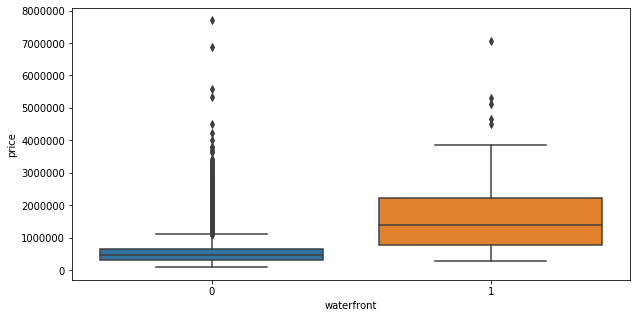

In [88]:
plt.figure(figsize=(10,5))
sb.boxplot(x='waterfront', y='price', data=df)